# Predicting property sale prices in France: a study based on the DVF dataset
## Exploratory notebook

## Necessary libraires import

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import imageio.v2 as iio
import matplotlib.dates as mdates
    
import plotly.io as pio
pio.renderers.default = "notebook"

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Load DVF Dataset

In [9]:
data_path = 'dvf.csv'

df_dvf = pd.read_csv(data_path, low_memory=False)

# df_dvf.head(20)

### Inspect Dataset properties

Thanks to the **info** and **describe** methods, it is possible to quickly view the data contained in our dataset (entire CSV equivalent to 3GB).
- The first method allows us to access the column names and their associated value types.
- The second method allows us to view the orders of magnitude of the different columns.

In [3]:
df_dvf.info()
df_dvf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20133668 entries, 0 to 20133667
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero         

numero_disposition  valeur_fonciere  adresse_numero   code_postal  \
count        2.013367e+07     1.993772e+07    1.260362e+07  1.998002e+07   
mean         1.234985e+00     1.529514e+06    7.150326e+02  5.000524e+04   
std          7.899619e+00     1.684699e+07    2.017854e+03  2.739363e+04   
min          1.000000e+00     1.000000e-02    1.000000e+00  1.000000e+03   
25%          1.000000e+00     6.900000e+04    8.000000e+00  2.823000e+04   
50%          1.000000e+00     1.650000e+05    2.500000e+01  4.914000e+04   
75%          1.000000e+00     3.030000e+05    1.000000e+02  7.500700e+04   
max          1.246000e+03     1.415000e+10    9.999000e+03  9.749000e+04   

       ancien_code_commune  lot1_surface_carrez  lot2_surface_carrez  \
count           408.000000         1.761506e+06        557955.000000   
mean          20094.698529         6.735296e+01            64.035822   
std           18521.130057         2.082315e+02            71.815365   
min           14666.000000         1.000000e-02             0.010000   
25%           14666.000000         3.572000e+01            43.820000   
50%           14666.000000         5.510000e+01            61.570000   
75%           15031.000000         7.410000e+01            76.620000   
max           85212.000000         9.614000e+03          8705.000000   

       lot3_surface_carrez  lot4_surface_carrez  lot5_surface_carrez  \
count         61941.000000         14984.000000          5271.000000   
mean             71.970848            84.467058            96.111413   
std              98.255307           142.936682           196.619148   
min               0.200000             0.340000             0.400000   
25%              41.680000            39.617500            35.635000   
50%              62.080000            67.360000            70.080000   
75%              85.050000           100.370000           114.100000   
max            6947.850000          6947.850000          6947.850000   

        nombre_lots  code_type_local  surface_reelle_bati  \
count  2.013367e+07     1.183813e+07         6.983283e+06   
mean   4.320833e-01     2.226831e+00         1.153680e+02   
std    8.386084e-01     9.308073e-01         8.281463e+02   
min    0.000000e+00     1.000000e+00         1.000000e+00   
25%    0.000000e+00     1.000000e+00         5.000000e+01   
50%    0.000000e+00     2.000000e+00         7.500000e+01   
75%    1.000000e+00     3.000000e+00         1.050000e+02   
max    2.360000e+02     4.000000e+00         5.934000e+05   

       nombre_pieces_principales  surface_terrain     longitude      latitude  
count               1.182539e+07     1.372763e+07  1.972417e+07  1.972417e+07  
mean                1.863278e+00     2.863297e+03  2.354309e+00  4.610026e+01  
std                 2.091897e+00     1.409837e+04  6.379150e+00  5.921900e+00  
min                 0.000000e+00     1.000000e+00 -6.315108e+01 -2.138654e+01  
25%                 0.000000e+00     2.460000e+02  3.268020e-01  4.466372e+01  
50%                 1.000000e+00     6.220000e+02  2.365491e+00  4.672001e+01  
75%                 4.000000e+00     1.782000e+03  4.643447e+00  4.866416e+01  
max                 1.980000e+02     1.072309e+07  5.583079e+01  5.108645e+01

In [4]:
print(df_dvf.columns)

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')


### Missing values overview

Thanks to the **missingno** library, it is possible to quickly view the null values contained in the columns as well as their total number. <br>
This allows us to easily identify whether it will be possible to delete columns or whether it will be necessary to evaluate this missing data.

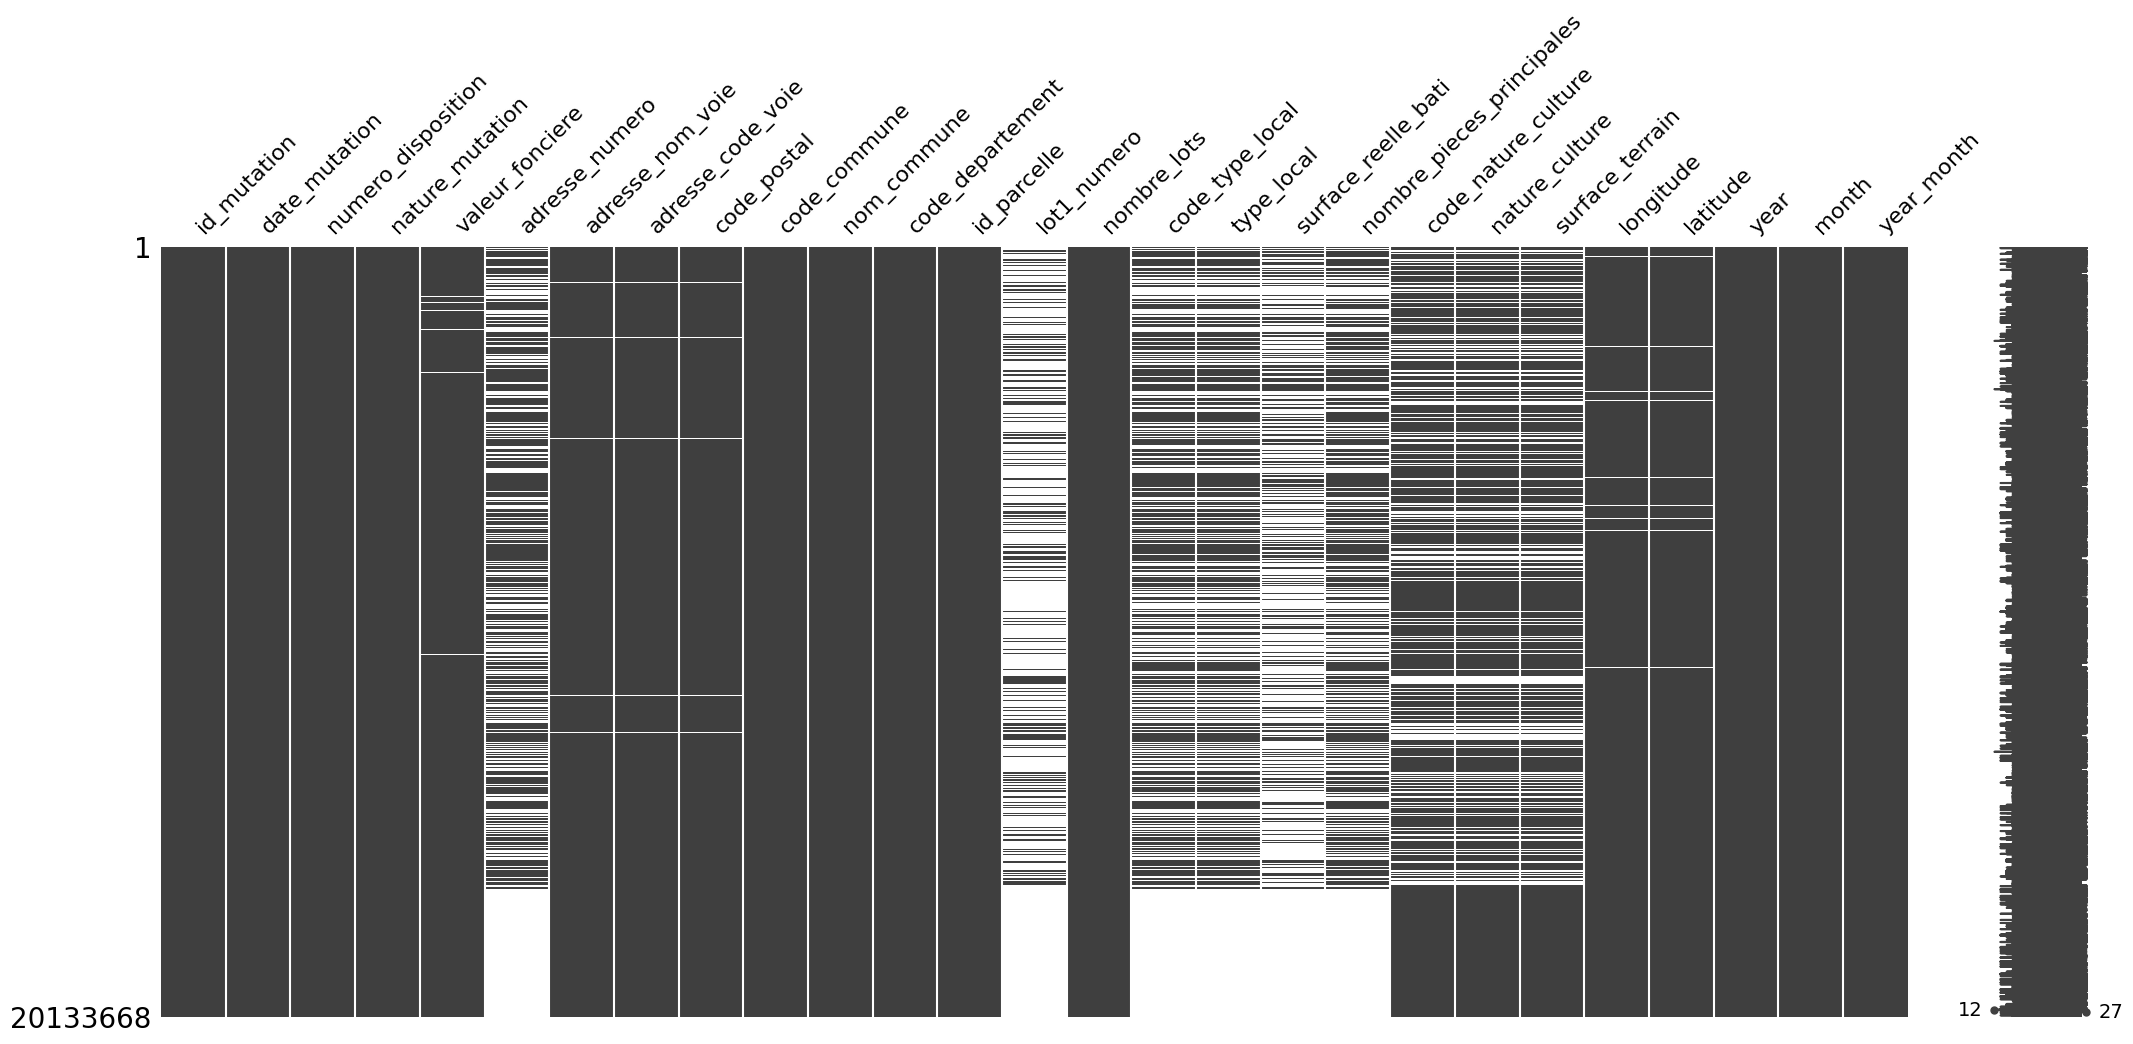

In [76]:
msno.matrix(df_dvf)
plt.show()

In [6]:
df_dvf.isnull().sum() / len(df_dvf) * 100

id_mutation                      0.000000
date_mutation                    0.000000
numero_disposition               0.000000
nature_mutation                  0.000000
valeur_fonciere                  0.973255
adresse_numero                  37.400254
adresse_suffixe                 95.517046
adresse_nom_voie                 0.761684
adresse_code_voie                0.757830
code_postal                      0.763164
code_commune                     0.000000
nom_commune                      0.000000
code_departement                 0.000000
ancien_code_commune             99.997974
ancien_nom_commune              99.997974
id_parcelle                      0.000000
ancien_id_parcelle              99.999930
numero_volume                   99.770166
lot1_numero                     68.647536
lot1_surface_carrez             91.250943
lot2_numero                     91.009393
lot2_surface_carrez             97.228746
lot3_numero                     98.398518
lot3_surface_carrez             99

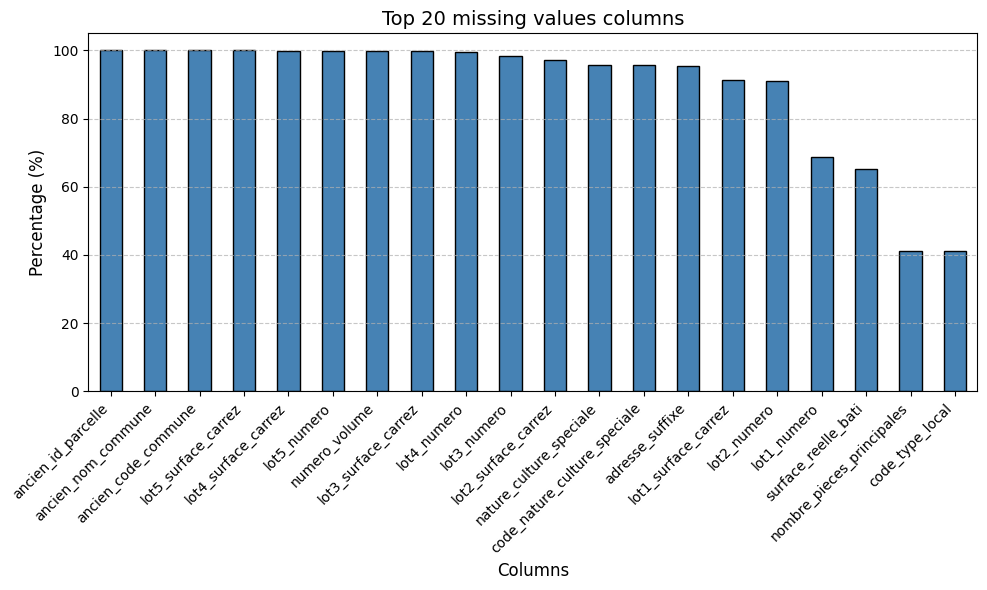

In [7]:

missing_percent = (df_dvf.isnull().sum() / len(df_dvf) * 100).sort_values(ascending=False)

# Take only the 15 columns with more missing values
top_missing = missing_percent.head(20)

# Barplot
plt.figure(figsize=(10,6))
top_missing.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Top 20 missing values columns', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


To directly access the names of the ‘deletable’ columns, i.e. those with more than 90% missing values, we save them in a list.

In [8]:
# Delete columns
df_dvf = df_dvf.loc[:, df_dvf.isnull().mean() < 0.9]

df_dvf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20133668 entries, 0 to 20133667
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id_mutation                object 
 1   date_mutation              object 
 2   numero_disposition         int64  
 3   nature_mutation            object 
 4   valeur_fonciere            float64
 5   adresse_numero             float64
 6   adresse_nom_voie           object 
 7   adresse_code_voie          object 
 8   code_postal                float64
 9   code_commune               object 
 10  nom_commune                object 
 11  code_departement           object 
 12  id_parcelle                object 
 13  lot1_numero                object 
 14  nombre_lots                int64  
 15  code_type_local            float64
 16  type_local                 object 
 17  surface_reelle_bati        float64
 18  nombre_pieces_principales  float64
 19  code_nature_culture        object 
 20  

# Correlation matrix 

The correlation matrix provides an overview of the linear relationships between the numerical variables in the DVF dataset. 
Correlation values range from -1 (negative relationship) to +1 (positive relationship).

Most variables show weak linear relationships, as most correlations are near zero.
**valeur_fonciere** (property value) has no strong correlation with other features, suggesting that prices depend on multiple non-linear factors such as location and property type.
The strongest correlation is negative (-0.84) between **code_type_local** and **nombre_pieces_principales**, meaning that property type strongly influences room count.
Overall, the dataset shows low multicollinearity, good for modeling, but linear models may not fully capture price dynamics.


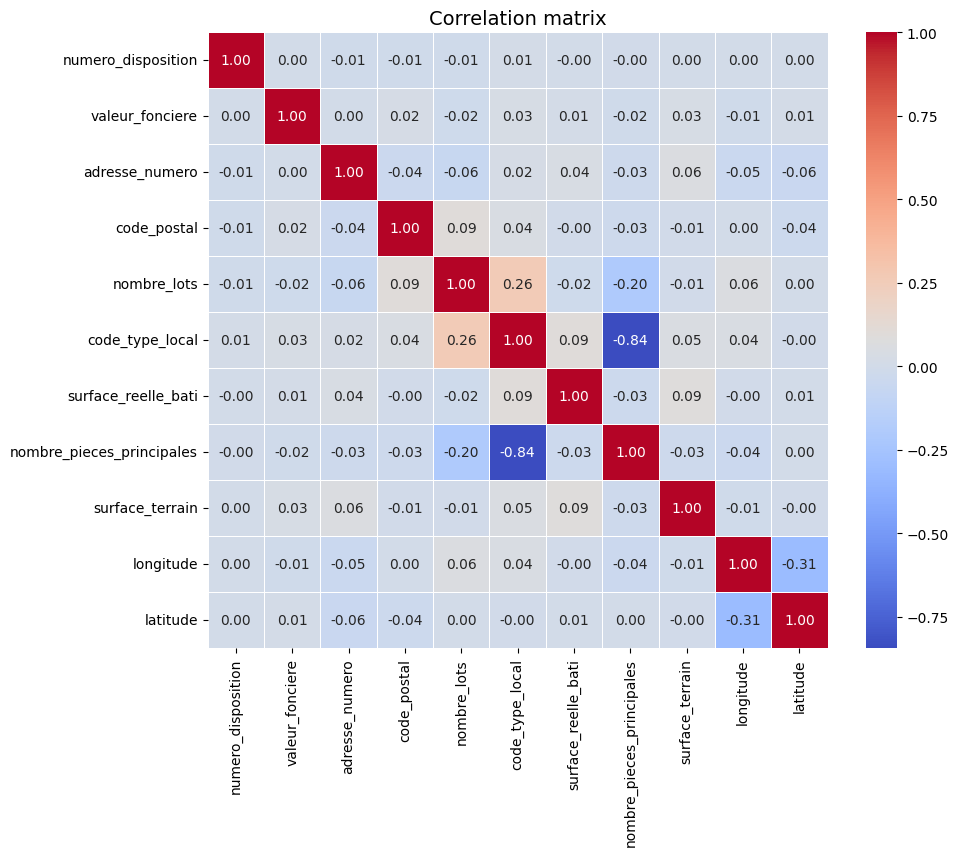

In [9]:
corr = df_dvf.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            cmap='coolwarm',      
            annot=True,          
            fmt=".2f",           
            linewidths=0.5,       
            cbar=True)           

plt.title("Correlation matrix", fontsize=14)
plt.savefig("correlation_matrix.png")
plt.show()

## Property Type Distribution
The dataset shows that most transactions involve outbuildings and houses, while apartments and commercial premises are less frequent. 
This reflects the predominance of residential property sales in the DVF dataset.

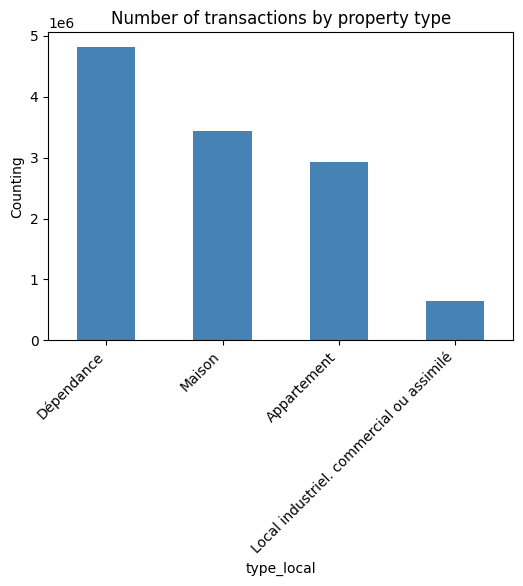

In [22]:
df_dvf['type_local'].value_counts().plot(kind='bar', figsize=(6,4), color='steelblue')
plt.title("Number of transactions by property type")
plt.ylabel("Counting")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


### Distribution of Sales Prices

The distribution of property sale prices is highly skewed, with most transactions involving relatively low to medium values. 
A few extreme outliers correspond to high-value properties. 
The **logarithmic scale** highlights the strong asymmetry typical of real estate markets.

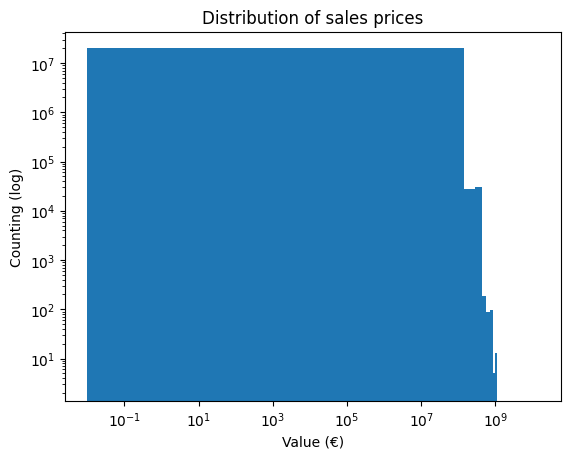

In [19]:
plt.hist(df_dvf['valeur_fonciere'], bins=100, log=True)
plt.xscale('log')
plt.xlabel("Value (€)")
plt.ylabel("Counting (log)")
plt.title("Distribution of sales prices") # logaritmic distribution
plt.show()

### Price Distribution by Property Type

The boxplot shows that property prices vary widely across all categories, with numerous high-value outliers. 
Houses and apartments have comparable median prices, while commercial and industrial properties show higher variability. The strong skew confirms the presence of extreme values.

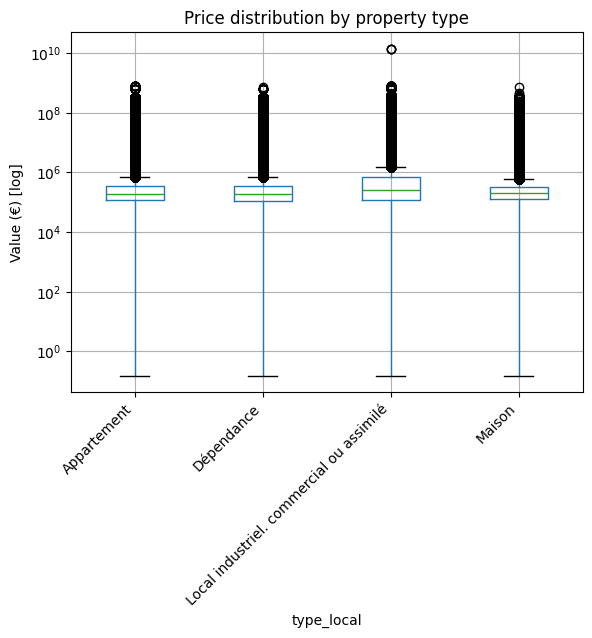

In [20]:
df_dvf.boxplot(column='valeur_fonciere', by='type_local')
plt.yscale('log')
plt.ylabel("Value (€) [log]")
plt.title("Price distribution by property type")
plt.suptitle("")  # remove default tile of chart
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


### Seasonal plot

The number of transactions follows a clear seasonal pattern, typically peaking in summer and at the end of the year. 
Activity dropped significantly in 2020 probably due to the COVID-19 pandemic but gradually recovered in the following years

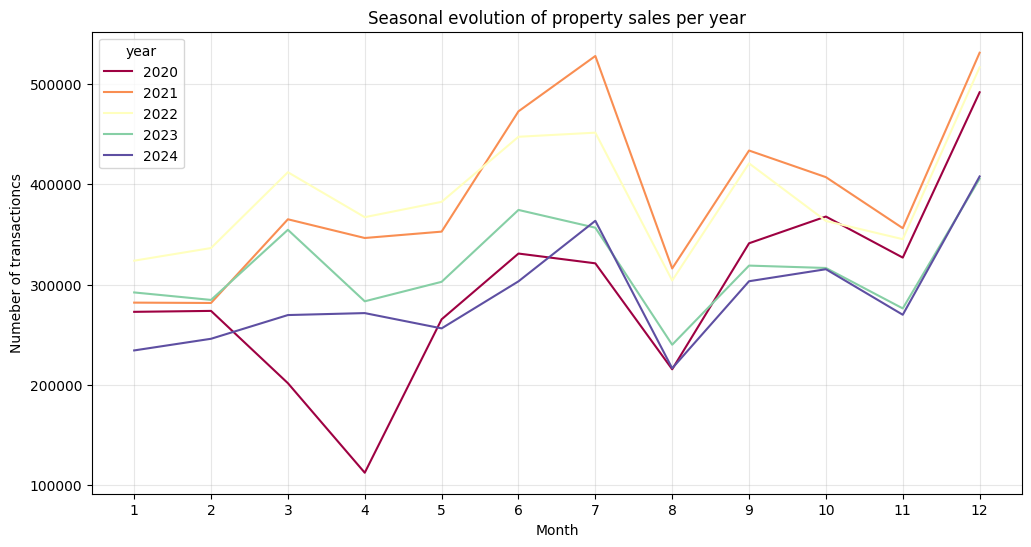

In [17]:
# Extract year and month
df_dvf['date_mutation'] = pd.to_datetime(df_dvf['date_mutation'], errors='coerce')
df_dvf['year'] = df_dvf['date_mutation'].dt.year
df_dvf['month'] = df_dvf['date_mutation'].dt.month

# Count the number of transactions by (year, month)
monthly_sales = df_dvf.groupby(['year', 'month']).size().reset_index(name='count')

# Chart: seasonality separated by year
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_sales,
    x='month', y='count', hue='year', palette='Spectral'
)
plt.title("Seasonal evolution of property sales per year")
plt.xlabel("Month")
plt.ylabel("Numeber of transactioncs")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.show()


### Impact of Surface Area on Property Prices

The scatter plot shows a positive relationship between surface area and property value, though with high dispersion. 
Larger properties generally sell for higher prices, but type differences and location effects create substantial variability.

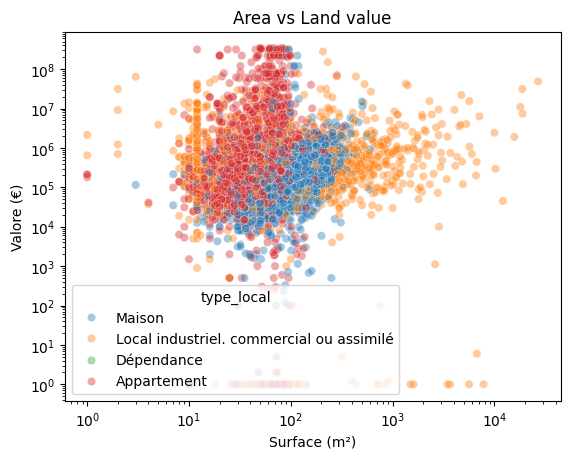

In [28]:
sns.scatterplot(
    data=df_dvf.sample(50000),
    x='surface_reelle_bati', y='valeur_fonciere', hue='type_local', alpha=0.4
)
plt.xscale('log'); plt.yscale('log')
plt.title("Area vs Land value") #log scale
plt.xlabel("Surface (m²)"); plt.ylabel("Valore (€)")
plt.show()


### Average Monthly Sale Price Over Time

The average property value shows irregular fluctuations over time, with several extreme spikes likely caused by outlier transactions. <br>
These anomalies suggest the need for data cleaning or outlier filtering before modeling price trends.

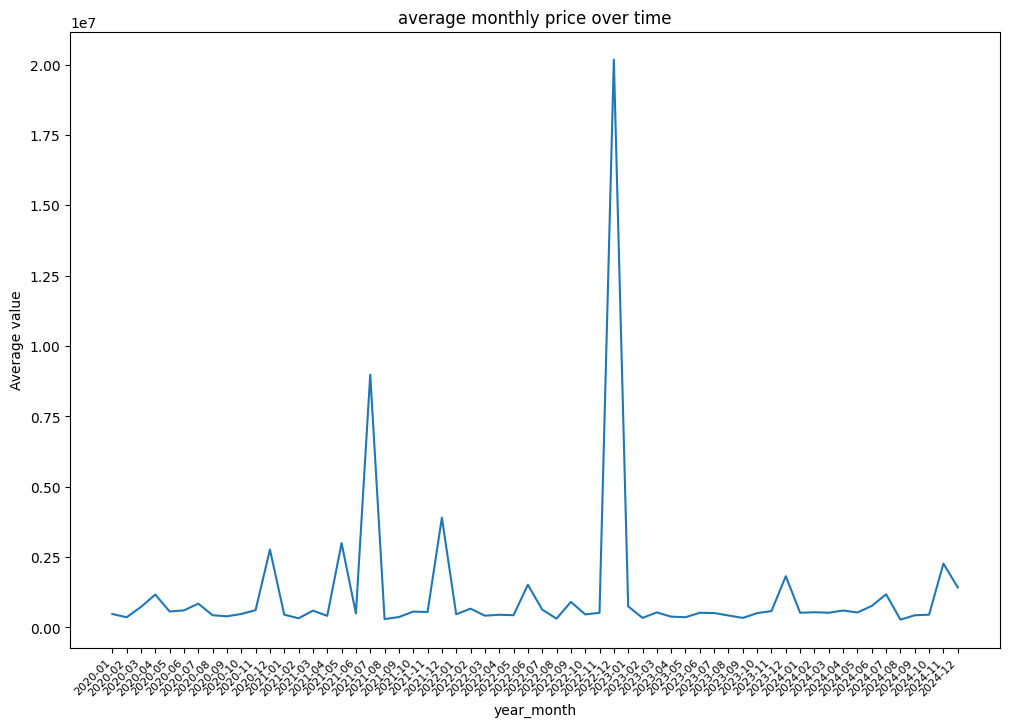

In [43]:
df_dvf['date_mutation'] = pd.to_datetime(df_dvf['date_mutation'], errors='coerce')
df_dvf['year_month'] = df_dvf['date_mutation'].dt.to_period('M')

monthly_price = (
    df_dvf.groupby('year_month')['valeur_fonciere']
    .mean().reset_index()
)
monthly_price['year_month'] = monthly_price['year_month'].astype(str)

plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_price, x='year_month', y='valeur_fonciere')
plt.xticks(rotation=45)
plt.title("average monthly price over time")
plt.ylabel("Average value") # Euro
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

### Geographical Distribution of Property Sales in France

The geographical visualization highlights clear spatial patterns in real estate transactions across France.
Most transactions are concentrated in Île-de-France, Auvergne-Rhône-Alpes, and Provence-Alpes-Côte d’Azur, which correspond to the country’s most urbanized regions. 
The Paris metropolitan area in particular shows both a high density of transactions and the presence of some of the highest property values.<br>

Coastal regions, especially along the French Riviera and the Atlantic coast, also display clusters of high-value properties, reflecting strong demand in touristic and luxury real estate markets. In contrast, central and rural regions exhibit lower transaction density and generally lower prices, consistent with smaller populations and less market activity.

Overall, the map confirms a strong geographical inequality in the French housing market, with major cities and coastal zones concentrating the most expensive transactions.

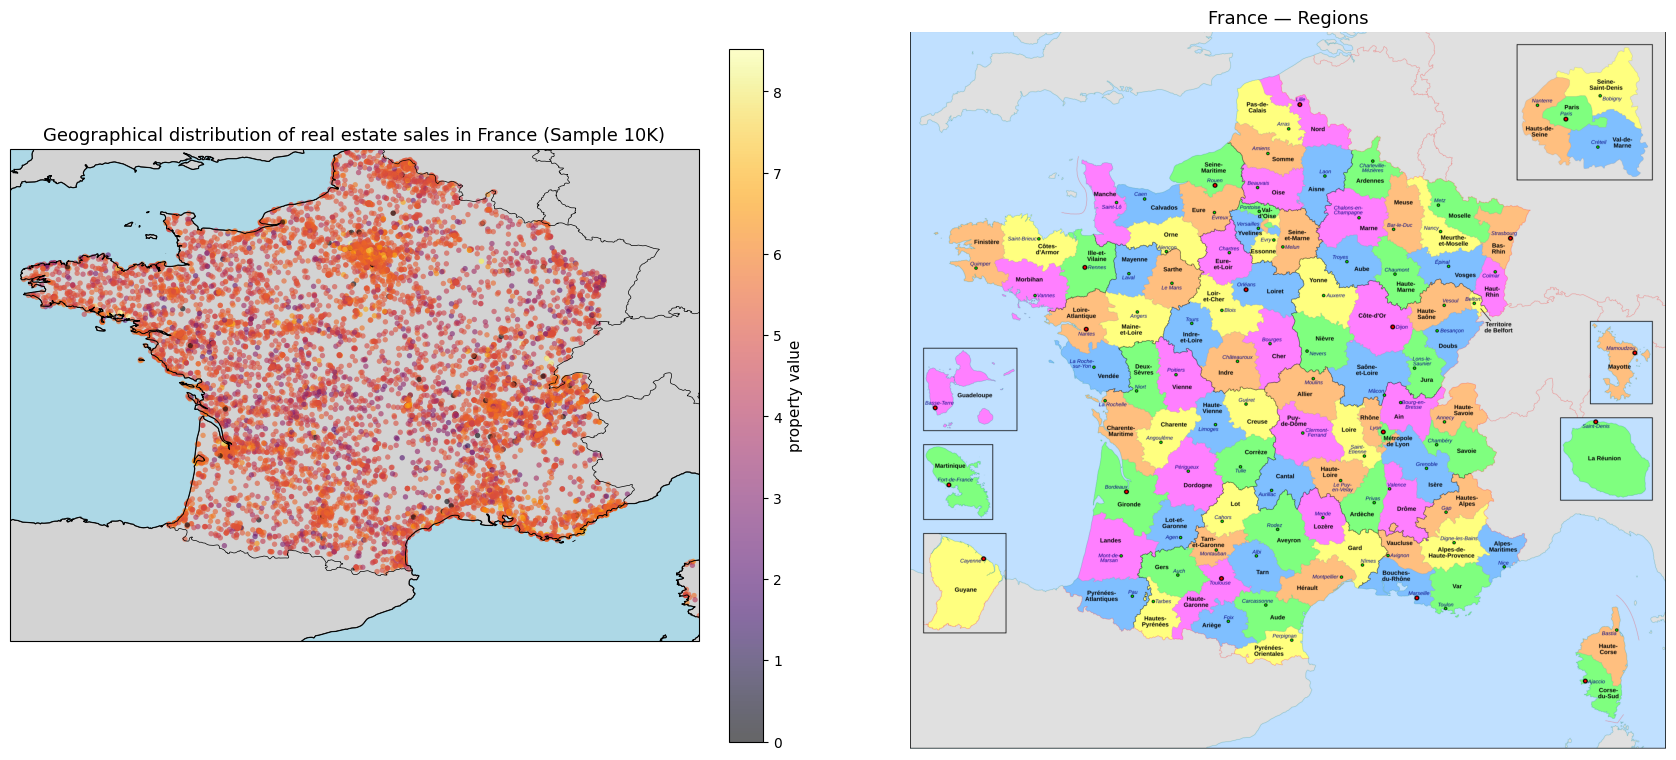

In [30]:
# Create a geographic subset and log-transform property values
df_geo = df_dvf.dropna(subset=['longitude', 'latitude', 'valeur_fonciere']).copy()
df_geo = df_geo[df_geo['valeur_fonciere'] > 0]  # exclude invalid values
df_geo['valeur_fonciere_log'] = np.log10(df_geo['valeur_fonciere'])

# (Optional) sample for performance
df_geo = df_geo.sample(10000, random_state=42)

# --- First: create a 1x2 figure ---
fig, axes = plt.subplots(1, 2, figsize=(18, 9),
                         subplot_kw={'projection': ccrs.PlateCarree()})
ax1, ax2 = axes

# --- LEFT subplot: scatter plot with map background ---
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5)
ax1.add_feature(cfeature.COASTLINE, linewidth=0.7)
ax1.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax1.set_extent([-5, 9, 41, 51], crs=ccrs.PlateCarree())

# Scatter plot
sc = ax1.scatter(
    df_geo['longitude'],
    df_geo['latitude'],
    c=df_geo['valeur_fonciere_log'],
    cmap='inferno',
    s=15,
    alpha=0.6,
    edgecolor='none',
    transform=ccrs.PlateCarree()
)

# Add colorbar specific to the first subplot
cbar = fig.colorbar(sc, ax=ax1, fraction=0.046, pad=0.04)
cbar.set_label('property value', fontsize=11)

# Add title and labels
ax1.set_title('Geographical distribution of real estate sales in France (Sample 10K)', fontsize=13)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# --- RIGHT subplot: static image ---
# Remove projection for this axis (Cartopy doesn't render images easily)
# So we’ll overlay an AxesImage in 2D coordinates on the second subplot
# Easiest way: use fig.add_subplot() separately for the image
fig.delaxes(ax2)  # remove the second cartopy subplot

# Create a normal 2D Matplotlib axis in the same position
ax_img = fig.add_axes([0.55, 0.1, 0.42, 0.8])  # [left, bottom, width, height] of figure coordinates

# Read and display the image
img = iio.imread("img/France_départementale.png")
ax_img.imshow(img)
ax_img.axis('off')
ax_img.set_title("France — Regions", fontsize=13)

# --- Adjust layout ---
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.15)
plt.show()


### Top 20 Departments by Number of Property Sales

The departments with the highest number of real estate transactions include Nord (59), Gironde (33), and Bouches-du-Rhône (13) — all of which are densely populated and economically active areas. These results align with national demographic patterns, as larger metropolitan regions tend to generate more sales activity.
Departments such as Rhône (69), Alpes-Maritimes (06), and Haute-Garonne (31) also appear among the top 10, confirming strong real estate demand around major urban centers like Lyon, Nice, and Toulouse.

Overall, the chart highlights how property market activity is heavily concentrated in France’s most urbanized regions.

In [38]:
# Extract deparment list with relative code 
dept_list = df_dvf[['code_departement', 'nom_commune']].drop_duplicates().sort_values('code_departement')

# Print list
print(len(dept_list))
dept_list.head(10)

33378


code_departement          nom_commune
0                   01            Ceyzériat
13130               01              Ruffieu
12926               01             Échallon
12892               01             Mérignat
12786               01                Armix
12564               01  Boyeux-Saint-Jérôme
12552               01          Géovreisset
12478               01               Villes
12423               01               Conand
12204               01               Plagne

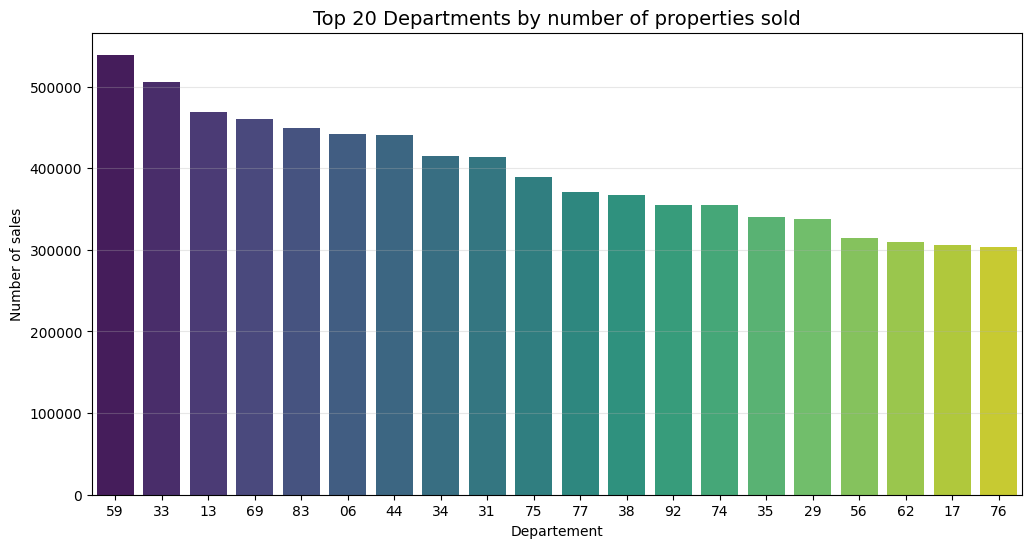

In [77]:
# --- Number of properties sold by department ---
sales_by_dept = (
    df_dvf.groupby('code_departement')
    .size()
    .reset_index(name='num_vendite')
    .sort_values(by='num_vendite', ascending=False)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=sales_by_dept.head(20),
    x='code_departement', y='num_vendite',
    palette='viridis'
)
plt.title("Top 20 Departments by number of properties sold", fontsize=14)
plt.xlabel('Departement')
plt.ylabel('Number of sales')
plt.grid(axis='y', alpha=0.3)
plt.show()



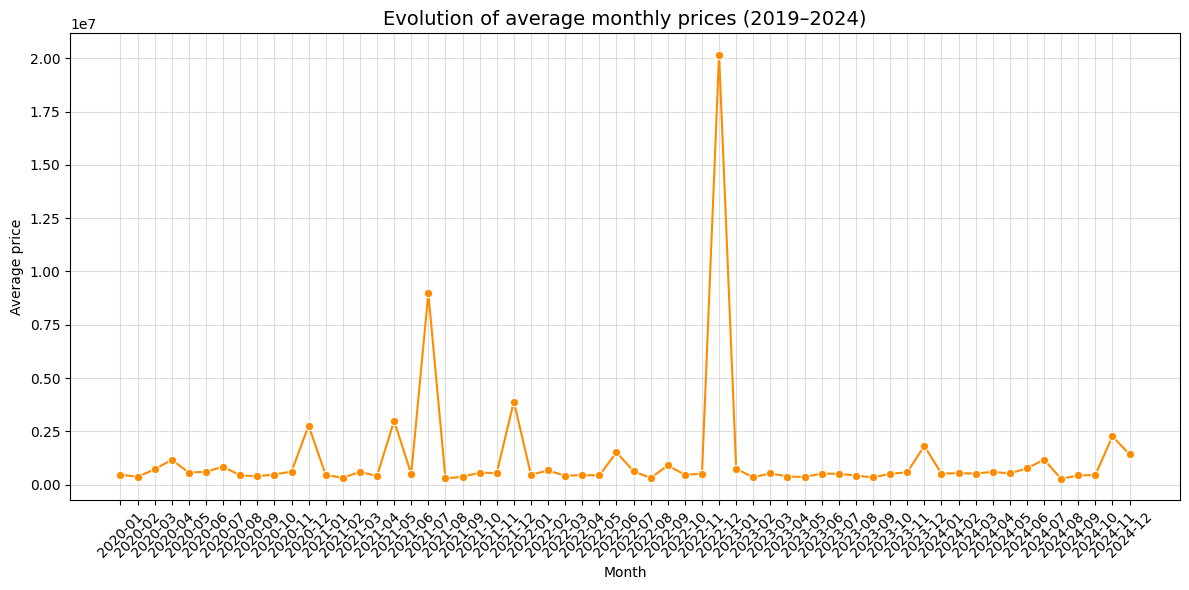

In [59]:
# --- Evolution of average prices over time (2019–2024) ---

# the date must be in datetime format
df_dvf['date_mutation'] = pd.to_datetime(df_dvf['date_mutation'], errors='coerce')

# Filter years 2019–2024
df_period = df_dvf[df_dvf['date_mutation'].dt.year.between(2019, 2024)]

# Add column Year-Month
df_period['year_month'] = df_period['date_mutation'].dt.to_period('M')

# Calculate average monthly price
monthly_avg = (
    df_period.groupby('year_month')['valeur_fonciere']
    .mean()
    .reset_index()
    .sort_values(by='year_month')
)
monthly_avg['year_month'] = monthly_avg['year_month'].astype(str)

# --- Line plot to show price's evolution ---
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_avg,
    x='year_month', y='valeur_fonciere',
    marker='o', color='darkorange'
)
plt.title('Evolution of average monthly prices (2019–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


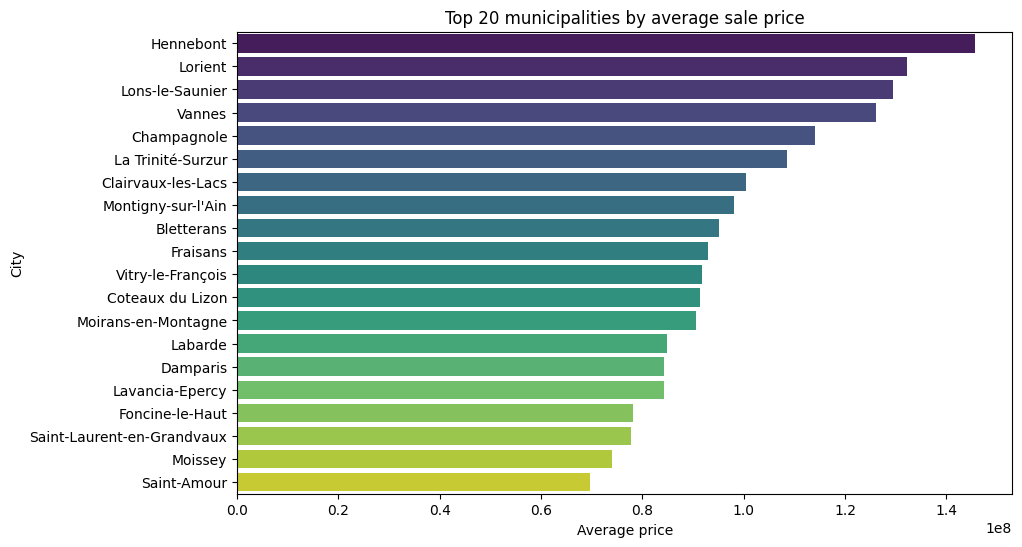

In [78]:
# Average prices by city
price_by_city = df_dvf.groupby('nom_commune')['valeur_fonciere'].mean().reset_index()
top_cities = price_by_city.sort_values('valeur_fonciere', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, y='nom_commune', x='valeur_fonciere', palette='viridis')
plt.title("Top 20 municipalities by average sale price")
plt.xlabel("Average price")
plt.ylabel("City")
plt.show()


### Evolution of average monthly prices (2019–2024)

The chart shows how the average property sale price in France has evolved month by month concering the dataset period 2019 and 2024. <br>
Despite several sharp spikes likely caused by exceptional transactions or outliers, the overall trend appears relatively stable. <br>
This suggests that, while individual high-value sales occasionally distort the monthly average, the broader market did not experience major long-term volatility during this period.

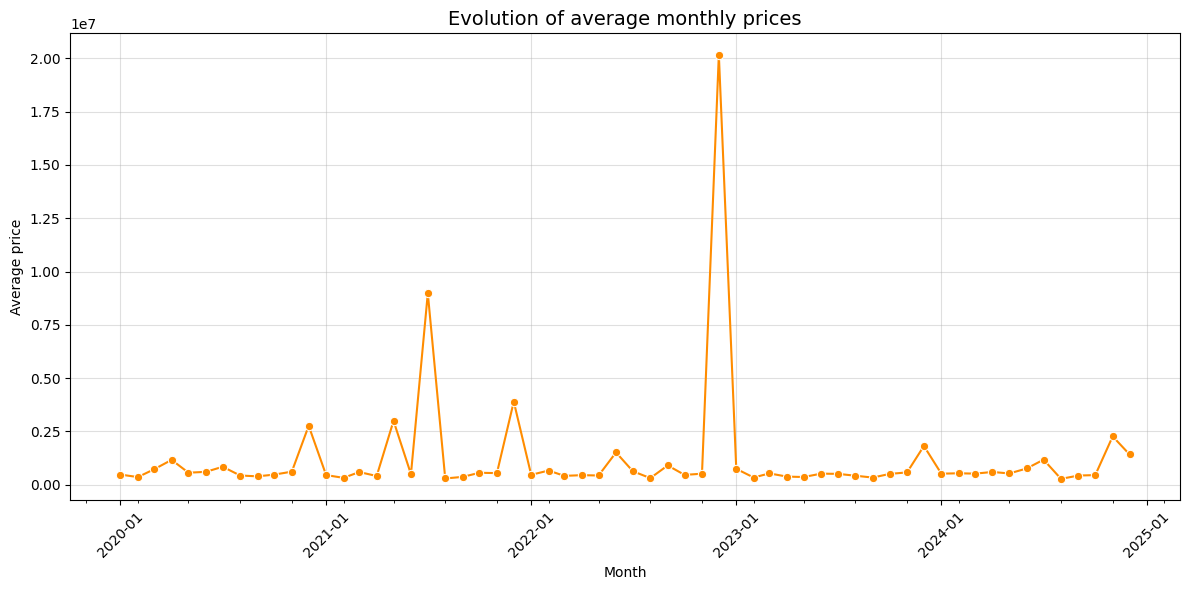

In [42]:
# date mutation is in datetime format
df_dvf['date_mutation'] = pd.to_datetime(df_dvf['date_mutation'], errors='coerce')

# Add Year-Month column
df_period['year_month'] = df_period['date_mutation'].dt.to_period('M')

# Calculate average monthly price
monthly_avg = (
    df_period.groupby('year_month')['valeur_fonciere']
    .mean()
    .reset_index()
    .sort_values(by='year_month')
)

# Convert the period to datetime for formatting
monthly_avg['year_month'] = monthly_avg['year_month'].dt.to_timestamp()

# Line plot with formatted X-axis 
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_avg,
    x='year_month', y='valeur_fonciere',
    marker='o', color='darkorange'
)

plt.title('Evolution of average monthly prices', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average price')

# Format the x-axis with one major tick per year and one minor tick every 3 months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

### Number of transactions per month

The chart highlights the seasonality of real estate transactions in France.
Sales activity tends to increase during the summer months, peaking in June and July, and again in December, likely due to year-end transactions and fiscal timing. <br>
Conversely, August shows a notable drop, reflecting the slowdown typical of the vacation period.

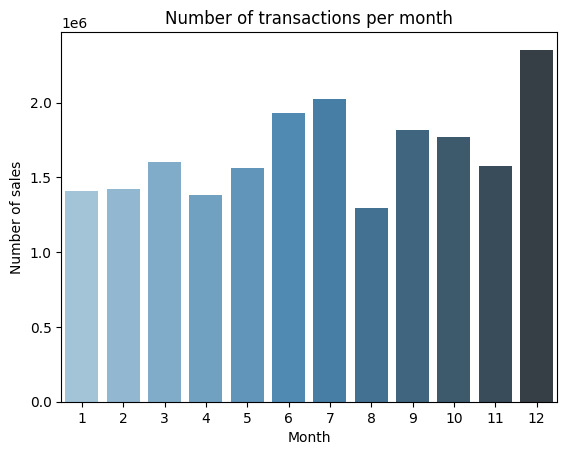

In [79]:
df_dvf['month'] = df_dvf['date_mutation'].dt.month
transactions_per_month = df_dvf.groupby('month').size().reset_index(name='count')

sns.barplot(data=transactions_per_month, x='month', y='count', palette='Blues_d')
plt.title("Number of transactions per month")
plt.xlabel("Month")
plt.ylabel("Number of sales")
plt.show()


## Conclusion 
This preliminary exploration of the DVF dataset provides a general understanding of its structure, data quality, and main patterns before conducting a formal Exploratory Data Analysis (EDA).

### 1. Dataset Structure and Quality
- The dataset is extremely large (~20 million records, 40 columns) and contains both administrative and transactional variables.  
- Several cadastral-related columns show over 90% missing values and can be safely removed.  
- The core variables relevant for predictive modeling — `valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `type_local`, `date_mutation`, `longitude`, and `latitude` — are complete and consistent.

### 2. Property Value Distribution
- Property sale prices are heavily right-skewed, with a few extremely high values.  
- A logarithmic transformation (`log10`) normalizes the distribution and improves interpretability.  
- This confirms that future models should work on a log-transformed price variable.

### 3. Property Type Differences
- “Appartements” represent the majority of transactions, while “Maisons” tend to have higher median prices and larger variability.  
- Property type is therefore a key categorical predictor to include in the Machine Learning models.

### 4. Relationship Between Area and Value
- A clear positive but sublinear correlation exists between built area and property value.  
- Some small but high-priced properties likely correspond to urban premium locations.  
- The price-per-square-meter ratio will be an important engineered feature.

### 5. Temporal Patterns
- Transaction volumes exhibit strong annual seasonality, with peaks in spring and early summer.  
- Average monthly prices increase from 2019 to 2022, then stabilize slightly after 2023.  
- Temporal variables should capture both trend and seasonality components.

### 6. Geographic Distribution
- Sales are concentrated in Île-de-France, the southeast coast, and major urban centers like the capital (Paris).  
- Significant spatial heterogeneity is visible in both transaction density and price levels.  
- Geographic variables (latitude, longitude, department) play a central role in property cost.


### Summary

The DVF dataset provides a rich and reliable foundation for predictive modeling of property sale prices.  
Despite some missing administrative fields, the essential features are clean and informative.  
The observed temporal, spatial, and structural heterogeneity indicates that future models should combine **log-transformed target values**, **spatial features**, and **time-based variables** to capture the complex dynamics of the French real estate market.